In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [7]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [8]:
df=df.rename(columns={'benign_0__mal_1':'class'})

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# **Exploratory data Analysis**

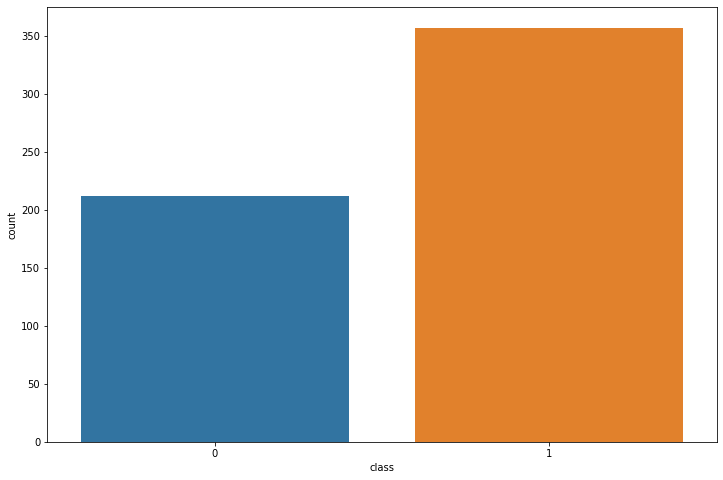

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x='class',data=df)

**from above plot we found that the dataset is balanced as there is enough no of data presenr in both the classes**

In [11]:

df.corr()['class'].sort_values(ascending=False)

class                      1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

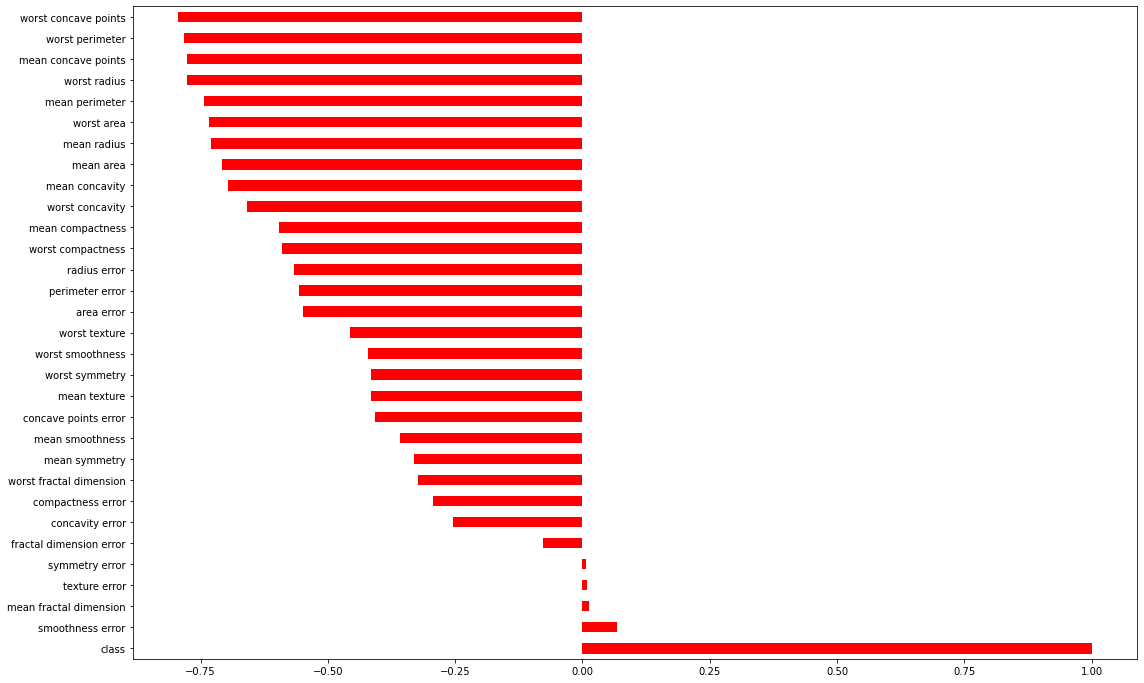

In [12]:
plt.figure(figsize=(18,12))
df.corr()['class'].sort_values(ascending=False).plot(kind='barh',color='red')

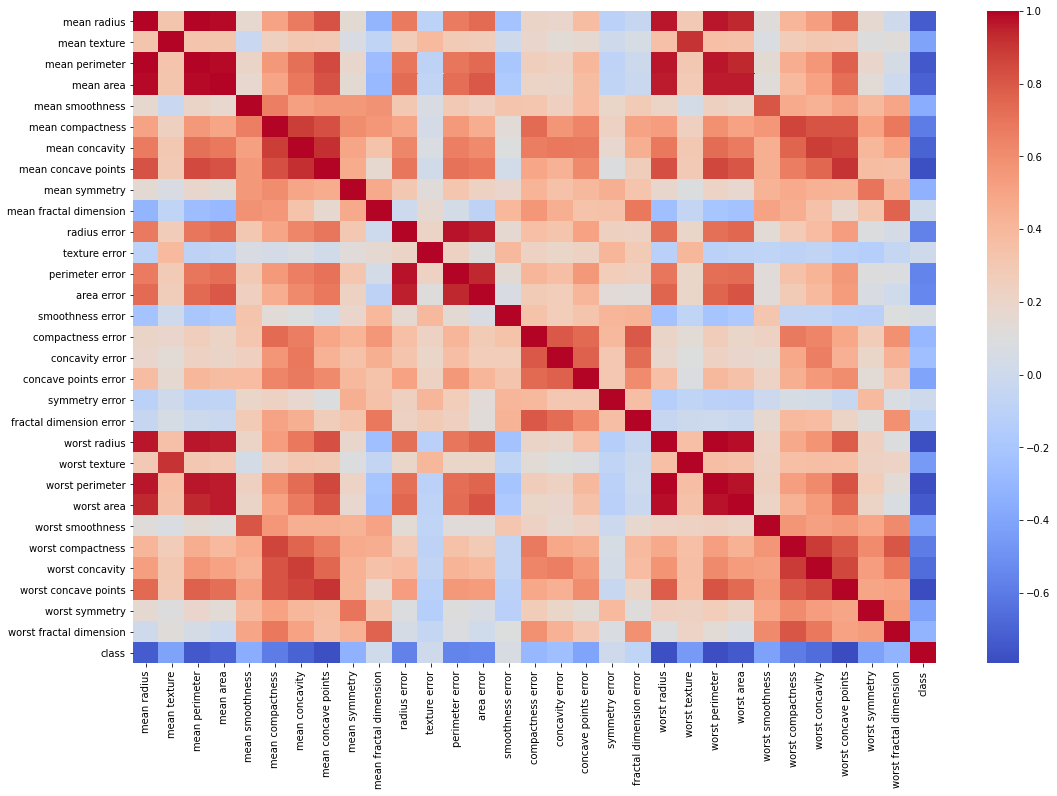

In [13]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),cmap='coolwarm')

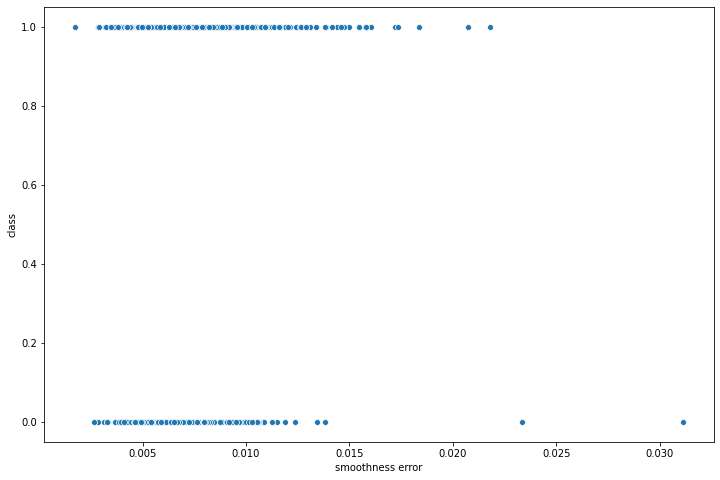

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='smoothness error',y='class',data=df)

In [15]:
X=df.drop('class',axis=1).values
y=df['class'].values


In [16]:
from sklearn.model_selection import train_test_split


In [17]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
 print('train size',X_train.shape,y_train.shape)
 print('test size',X_test.shape,y_test.shape)

train size (398, 30) (398,)
test size (171, 30) (171,)


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [19]:
X_train

array([[0.29624369, 0.27730808, 0.28381849, ..., 0.21839623, 0.15474078,
        0.12800949],
       [0.27812332, 0.22590463, 0.26940639, ..., 0.32576197, 0.09520993,
        0.18006104],
       [0.34276899, 0.14440311, 0.355879  , ..., 0.40203193, 0.24876799,
        0.31400475],
       ...,
       [0.32317939, 0.2404464 , 0.29937215, ..., 0.12093614, 0.17602996,
        0.05222109],
       [0.30799745, 0.33513696, 0.3052226 , ..., 0.66291727, 0.31815494,
        0.42777213],
       [0.21984426, 0.36557322, 0.20605023, ..., 0.2696299 , 0.22255076,
        0.11648016]])

In [20]:
X_test

array([[0.23404672, 0.30064254, 0.23366153, ..., 0.36828737, 0.2856298 ,
        0.27517803],
       [0.55090847, 0.39228948, 0.53695776, ..., 0.64912917, 0.19436231,
        0.09198033],
       [0.38047897, 0.33040243, 0.38070776, ..., 0.54934688, 0.25073921,
        0.21320787],
       ...,
       [0.10837945, 0.28238079, 0.11601027, ..., 0.3595791 , 0.206781  ,
        0.51848084],
       [0.30016161, 0.49983091, 0.31385559, ..., 0.55188679, 0.41119653,
        0.53628349],
       [0.2546158 , 0.14879946, 0.26120148, ..., 0.56640058, 0.21170905,
        0.53204476]])

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [22]:
X_train.shape

(398, 30)

In [23]:
model=Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [24]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600)

Epoch 1/600
13/13 [==============================] - 0s 18ms/step - loss: 0.6854 - val_loss: 0.6630
Epoch 2/600
13/13 [==============================] - 0s 8ms/step - loss: 0.6526 - val_loss: 0.6315
Epoch 3/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6247 - val_loss: 0.6024
Epoch 4/600
13/13 [==============================] - 0s 6ms/step - loss: 0.5970 - val_loss: 0.5684
Epoch 5/600
13/13 [==============================] - 0s 6ms/step - loss: 0.5629 - val_loss: 0.5280
Epoch 6/600
13/13 [==============================] - 0s 6ms/step - loss: 0.5238 - val_loss: 0.4832
Epoch 7/600
13/13 [==============================] - 0s 6ms/step - loss: 0.4820 - val_loss: 0.4392
Epoch 8/600
13/13 [==============================] - 0s 7ms/step - loss: 0.4414 - val_loss: 0.3975
Epoch 9/600
13/13 [==============================] - 0s 6ms/step - loss: 0.4026 - val_loss: 0.3597
Epoch 10/600
13/13 [==============================] - 0s 6ms/step - loss: 0.3683 - val_loss: 0.3261
Epoch 11

In [25]:
loss_df=pd.DataFrame(model.history.history)

In [26]:
loss_df

,loss,val_loss
0,0.685396,0.663029
1,0.652631,0.631455
2,0.624714,0.602379
3,0.596994,0.568358
4,0.562905,0.527963
...,...,...
595,0.002519,0.063668
596,0.002096,0.060265
597,0.002162,0.057713
598,0.002214,0.058716


<Figure size 864x576 with 0 Axes>

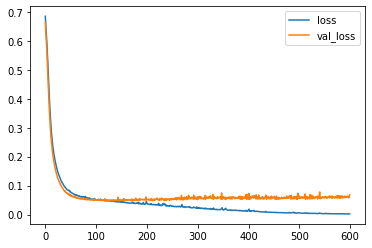

In [27]:
plt.figure(figsize=(12,8))
loss_df.plot()

# **We can see in above graph that our model is overfitting so we will earlystop the model**

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [30]:
model=Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [31]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600,callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 12ms/step - loss: 0.6916 - val_loss: 0.6820
Epoch 2/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6736 - val_loss: 0.6594
Epoch 3/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6507 - val_loss: 0.6315
Epoch 4/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6229 - val_loss: 0.5955
Epoch 5/600
13/13 [==============================] - 0s 6ms/step - loss: 0.5867 - val_loss: 0.5522
Epoch 6/600
13/13 [==============================] - 0s 6ms/step - loss: 0.5428 - val_loss: 0.5022
Epoch 7/600
13/13 [==============================] - 0s 6ms/step - loss: 0.4928 - val_loss: 0.4469
Epoch 8/600
13/13 [==============================] - 0s 6ms/step - loss: 0.4396 - val_loss: 0.3899
Epoch 9/600
13/13 [==============================] - 0s 6ms/step - loss: 0.3890 - val_loss: 0.3410
Epoch 10/600
13/13 [==============================] - 0s 6ms/step - loss: 0.3445 - val_loss: 0.3007
Epoch 11

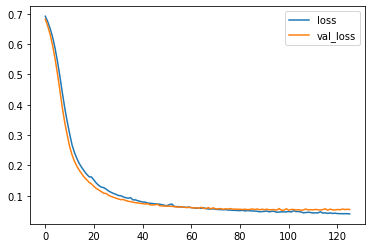

In [32]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

# **In the above graph we can see that our model is not having any sudden spike like earlier so it not overfitted now**

# **There is also a dropout method to prevent the overfitting.So we will add some dropout layers**

In [33]:
from tensorflow.keras.layers import Dropout

In [34]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [35]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600,callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 12ms/step - loss: 0.7091 - val_loss: 0.6779
Epoch 2/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6992 - val_loss: 0.6628
Epoch 3/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6780 - val_loss: 0.6534
Epoch 4/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6582 - val_loss: 0.6409
Epoch 5/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6416 - val_loss: 0.6255
Epoch 6/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6478 - val_loss: 0.6109
Epoch 7/600
13/13 [==============================] - 0s 7ms/step - loss: 0.6369 - val_loss: 0.5945
Epoch 8/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6226 - val_loss: 0.5774
Epoch 9/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6321 - val_loss: 0.5634
Epoch 10/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6044 - val_loss: 0.5506
Epoch 11

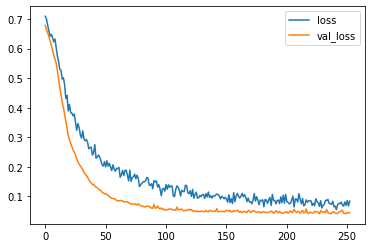

In [36]:
model_loss1=pd.DataFrame(model.history.history)
model_loss1.plot()

# **So this is even a good behaviour from the above cases after using both early stopping and  dropout**

# ***Evaluation And Prediction***

In [38]:
predict=model.predict_classes(X_test)
predict

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,log_loss,f1_score

In [45]:
print('classification report',classification_report(y_test,predict))
print('confusion matrix',confusion_matrix(y_test,predict))
print('\n')
print('f1 score',f1_score(y_test,predict))

classification report               precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

confusion matrix [[ 62   1]
 [  1 107]]


f1 score 0.9907407407407407
